In [1]:
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

import statsmodels.api as sm

import dataframe_image as dfi

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
import os

try:
    os.mkdir("../PLOTS/F_SUBAVG_GENDER")
except:
    print("F_SUBAVG_GENDER dir exists.")

#For testing, leave commented
swivel = 0
#swivel_order = [2, 1, 7, 3, 16, 6, 12, 9, 10, 4, 5, 15, 8, 14, 20, 0, 22, 13, 19, 11, 18, 21, 17]

desired_file_prefix = "F_GENDER" 

normalize_data=True

by_year = 1
lnconvert=False
 

F_SUBAVG_GENDER dir exists.


# FUNCTIONS

In [3]:
def func(x, m, c):
    return (m * x) + c

In [4]:
def color_corr_green(val):
  color = 'green' if val > 0.8 else 'black'
  return 'color: %s' % color

In [5]:
def gen_boxplot():

 case_list = []

 # Create list of data cases
 #
 for index in range(0,len(global_y_soc1)):
    name = global_y_soc1[index][0]
    if (name[5:] not in case_list):
        case_list.append(name[5:])

 print(case_list)

 # Handle one case at a time
 #
 for case in case_list:
        
    #print("case = ",case)
    
    pd_df = pd.DataFrame()
    sel_y = []
    
    for index in range(0,len(global_y_soc1)):
        
        name  = global_y_soc1[index][0]
        sel_y = global_y_soc1[index][1]
        
        # Cycle through years
        #
        if (case in name):    
            #print(case,name)
            name = name[0:5] + name[8:]
            #print("8 ",name)
            
            df = pd.DataFrame()
            df[name] = sel_y
            
            #Q1 = df[name].quantile(0.25)
            #Q3 = df[name].quantile(0.75)
            #IQR = Q3 - Q1    #IQR is interquartile range. 

            #filter = (df[name] >= Q1 - 1.5 * IQR) & (df[name] <= Q3 + 1.5 *IQR)
            #print(filter)
            #df = df.loc[filter]
            
            q = df[name].quantile(0.80)
            df = df[df[name] < q]
            
            pd_df = pd.concat([pd_df,df],axis=1)
        
            #print(pd_df)

    # Get occupation
    for code in soc_new_code:
        #print(code[0][0:2])
        if (code[0][0:2].find(case[0:2]) >= 0):
            #print(code[0],code[1])
            ocup = str(code[0]) + " " + str(code[1])
            
    #print(ocup)

    title = desired_file_prefix + " " + ocup + " boxplot " + str(case[3:])
    plt.figure(title,figsize=(10, 10))
    plt.title(title)

    #plt.ylim(0.0, 3e-6)

    pd_df.boxplot()
    plt.xticks(rotation = 90)
    plt.tight_layout()  

    save_title = "../PLOTS/" + desired_file_output + title + ".png"
    save_title = save_title.replace(",","")
    save_title = save_title.replace(" ","_")
    plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
    plt.show()
    
    #print("HERE")
    #print(df[df['YEAR'].str.contains(name)])
    
    ## ########################## correlations ######################
    
    title = title + "_pearson_corr"

    df_corr = pd_df.corr(method='pearson').style.applymap(color_corr_green)

    df = pd_df.corr(method='pearson')
 
    df_styled = df.style.background_gradient(axis=None, vmin=0.45, vmax=1.0)
  
    save_file = "../PLOTS/" + desired_file_output + title + ".png"
    dfi.export(df_styled, save_file, max_cols=-1, max_rows=-1)

    save_file = "../PLOTS/" + desired_file_output + title + ".xlsx"
    df_corr.to_excel(save_file)

    display(df_styled)        

# ALL CORRELATIONS

In [6]:
# Generate all correlations
#
def gen_corr():

  pd_df = pd.DataFrame()
  sel_y = []
    
  case_list = []

  # Create list of data cases
  #
  for index in range(0,len(global_y_soc1)):
    name = global_y_soc1[index][0]
    if (name[5:] not in case_list):
        case_list.append(name[5:])

  print(case_list)

  # Handle one case at a time
  #
  for case in case_list:
    
    for index in range(0,len(global_y_soc1)):
        
        name  = global_y_soc1[index][0]
        sel_y = global_y_soc1[index][1]
        
        # Cycle through years
        #
        if (case in name):    
            #print(case,name)
            
            temp_pd_df = pd.DataFrame()
            temp_pd_df[name] = sel_y
            pd_df = pd.concat([pd_df,temp_pd_df],axis=1)
        
            #print(pd_df)

            # Get occupation
            for code in soc_new_code:
                #print(code[0][0:2])
                if (code[0][0:2].find(case[0:2]) >= 0):
                    #print(code[0],code[1])
                    ocup = str(code[0]) + " " + str(code[1])
            
  #print(ocup)

  title = desired_file_prefix + ocup +" ALL boxplot " + str(case[3:])
  plt.figure(title,figsize=(10, 10))
  plt.title(title)

  #plt.ylim(0.0, 3e-6)

  pd_df.boxplot()
  plt.xticks(rotation = 90)
  plt.tight_layout()  

  save_title = "../PLOTS/" + desired_file_output + title + ".png"
  save_title = save_title.replace(",","")
  save_title = save_title.replace(" ","_")
  plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
  plt.show()
    
  #print("HERE")
  #print(df[df['YEAR'].str.contains(name)])
    
  ## ########################## correlations ######################
    
  title = title + "_pearson_corr"

  df_corr = pd_df.corr(method='pearson').style.applymap(color_corr_green)

  df = pd_df.corr(method='pearson')
 
  df_styled = df.style.background_gradient(axis=None, vmin=0.45, vmax=1.0)
  
  save_file = "../PLOTS/" + desired_file_output + title + ".png"
  dfi.export(df_styled, save_file, max_cols=-1, max_rows=-1)

  save_file = "../PLOTS/" + desired_file_output + title + ".xlsx"
  df_corr.to_excel(save_file)

  display(df_styled)        



# COLLATE THE DATA

In [7]:
lastfound = ""
pcov      = []


no_genericDB_data_dict = {}


ocovper   = []
ocov      = []
lines     = []

global_y_soc1 = []

for ocup_sel in range(1,24):
    
    print("########################################## NEW OCCUPATION ###############################################")
    print("")
    
    for year in range(0,8): 

        print("########################################## NEW YEAR ###############################################")
        desired_file_output = "./NF_SUBAVG_GENDER/NF_GENDER_" + str(2011+year) + "_"    
        %run ./analysis-code-subcat3-avg.ipynb

        #print(global_y_soc1)
    

########################################## NEW OCCUPATION ###############################################

########################################## NEW YEAR ###############################################
SOC_all.csv
global_y_soc1 found.
global_soc1_empty not found....defining
F_GENDER_GMX_M_all.csv
F_GENDER_GFX_F_all.csv
dict_keys(['F_GENDER_GMX_M', 'F_GENDER_GFX_F'])
code_found: 11-0000:Management Occupations
*gt(adding): F_GENDER_GMX_M_112011
*gt(adding): F_GENDER_GMX_M_113011
*gt(adding): F_GENDER_GMX_M_113121
*gt(adding): F_GENDER_GMX_M_119013
*gt(adding): F_GENDER_GMX_M_119111
code_found: 11-0000:Management Occupations
*gt(adding): F_GENDER_GFX_F_112021
*gt(adding): F_GENDER_GFX_F_113011
*gt(adding): F_GENDER_GFX_F_113121
*gt(adding): F_GENDER_GFX_F_119013
*gt(adding): F_GENDER_GFX_F_119111
########################################## NEW YEAR ###############################################
SOC_all.csv
global_y_soc1 found.
global_soc1_empty found.
F_GENDER_GMX_M_all.csv
F_GENDER_

# SAMPLE STRUCTURE

In [8]:
for i in range(0,10):      #len(global_y_soc1)):
    print(global_y_soc1[i])

['2011_F_GENDER_GMX_M_111011-Management Occupations', [1.8251505749224311e-06, 8.21317758715094e-07]]
['2011_F_GENDER_GMX_M_112011-Management Occupations', [4.562876437306078e-07]]
['2011_F_GENDER_GMX_M_113011-Management Occupations', [2.7377258623836466e-07, 6.388027012228509e-07, 2.7377258623836466e-07]]
['2011_F_GENDER_GMX_M_113121-Management Occupations', [0, 0, 0, 0]]
['2011_F_GENDER_GMX_M_119013-Management Occupations', [2.3179412301514876e-05, 1.8251505749224311e-06, 9.125752874612155e-08, 2.1901806899069173e-06, 6.388027012228509e-07]]
['2011_F_GENDER_GMX_M_119111-Management Occupations', [4.562876437306078e-07, 9.125752874612156e-07, 4.562876437306078e-07]]
['2011_F_GENDER_GFX_F_111011-Management Occupations', [0, 0, 0, 0]]
['2011_F_GENDER_GFX_F_112021-Management Occupations', [0, 0, 0, 0]]
['2011_F_GENDER_GFX_F_113011-Management Occupations', [6.844626967830253e-07, 1.3689253935660506e-07, 4.106776180698152e-07]]
['2011_F_GENDER_GFX_F_113121-Management Occupations', [0, 0, 0,

In [9]:
print(global_y_soc1[-1])

['2018_NO DATA FOUND-Military Specific Occupations', [0, 0, 0, 0]]


In [10]:
code_list = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if (ucase.find("NO DATA FOUND") < 0):
        if ocup not in code_list:
            code_list.append(ocup)
        
print(code_list)

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']


In [11]:
print( str(global_y_soc1[0][0]).split("_")[1:3]  )

ca = global_y_soc1[0][0].split("_")[1:3]
print(ca[0] + "_" + ca[1])

['F', 'GENDER']
F_GENDER


['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']
../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_110000_Management_Occupations_time_plots_.png


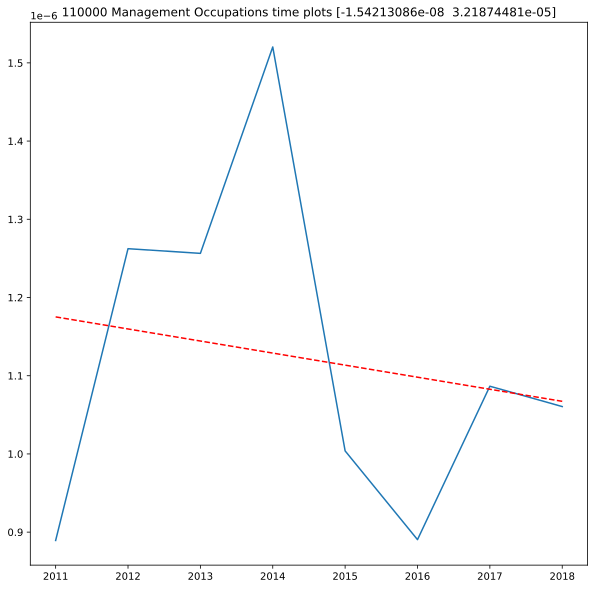

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_130000_Business_and_Financial_Operations_Occupations_time_plots_.png


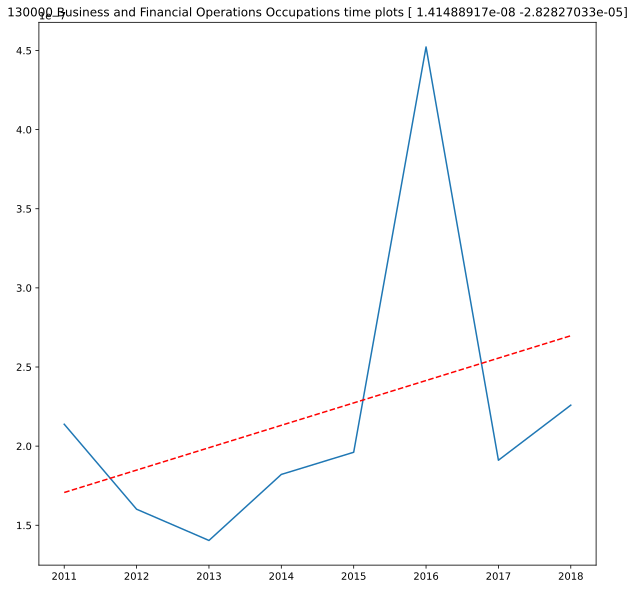

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_150000_Computer_and_Mathematical_Occupations_time_plots_.png


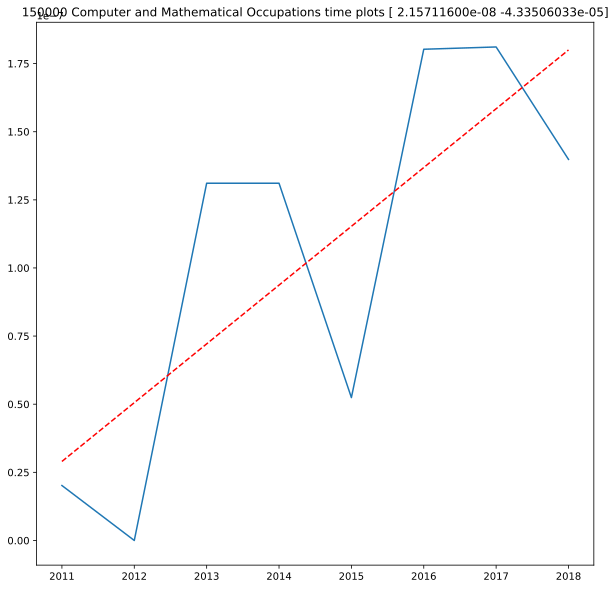

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_170000_Architecture_and_Engineering_Occupations_time_plots_.png


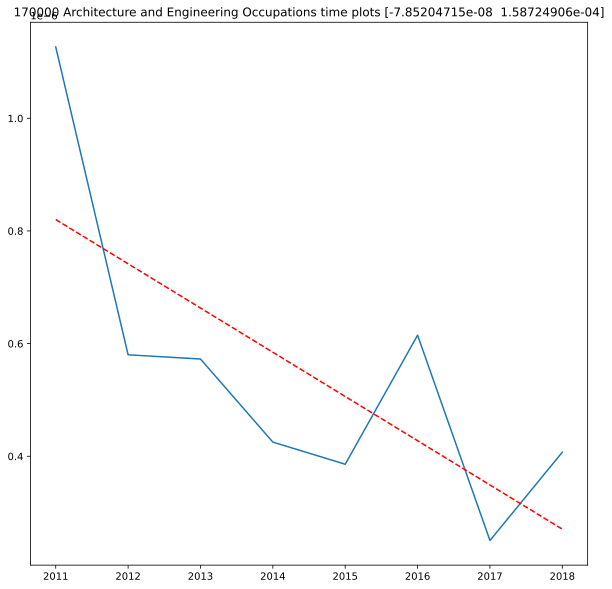

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_190000_Life_Physical_and_Social_Science_Occupations_time_plots_.png


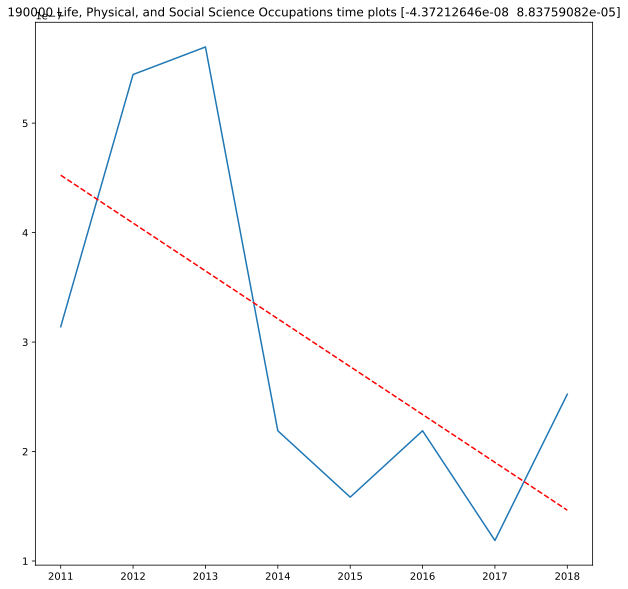

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_210000_Community_and_Social_Service_Occupations_time_plots_.png


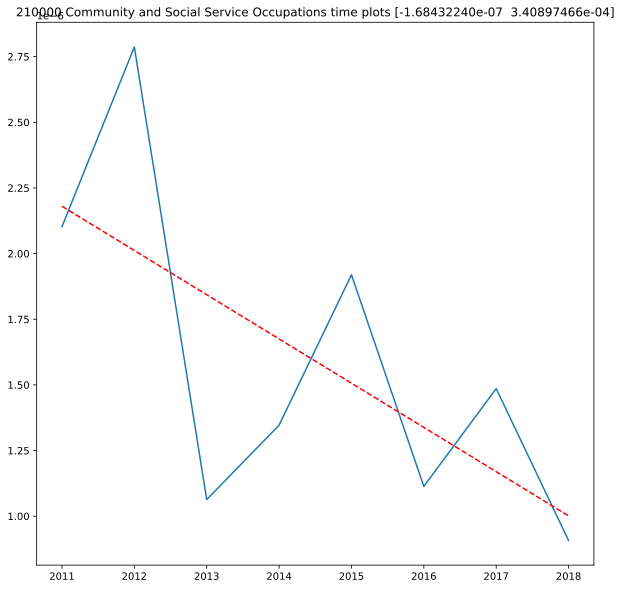

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_230000_Legal_Occupations_time_plots_.png


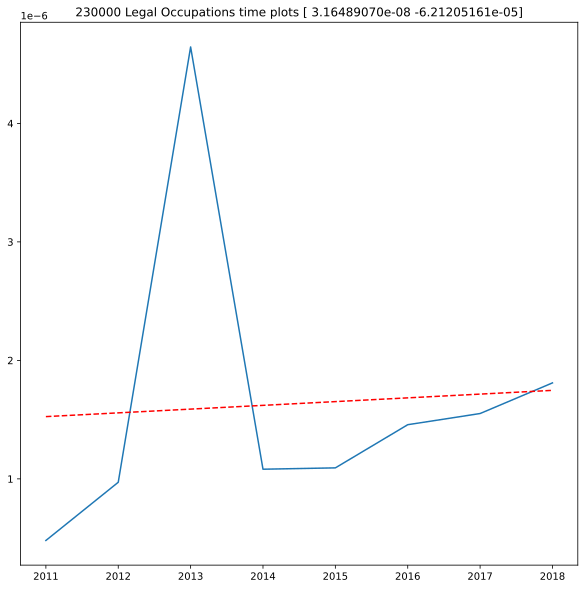

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_250000_Educational_Instruction_and_Library_Occupations_time_plots_.png


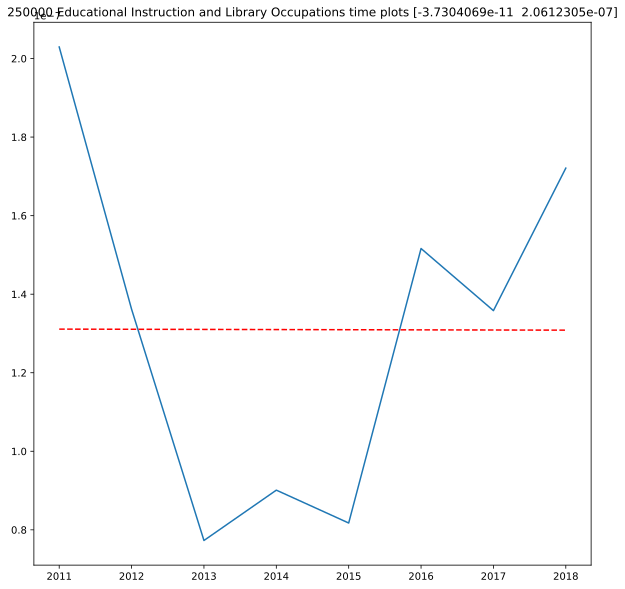

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_270000_Arts_Design_Entertainment_Sports_and_Media_Occupations_time_plots_.png


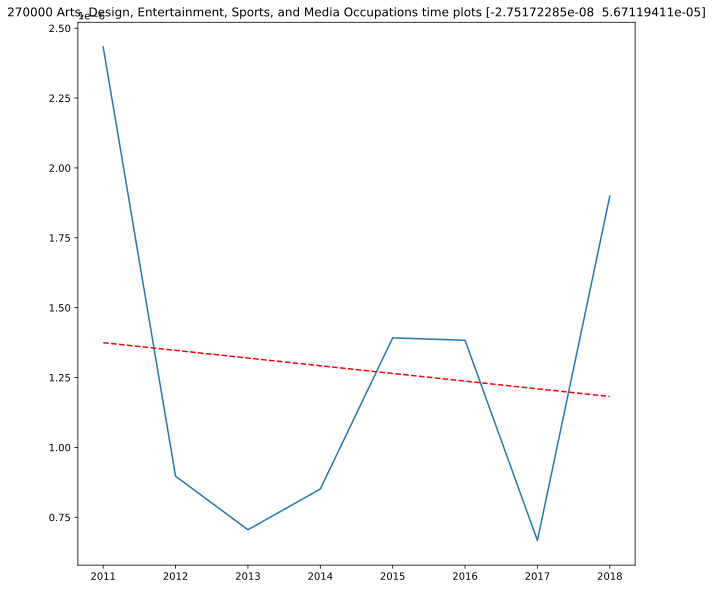

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_290000_Healthcare_Practitioners_and_Technical_Occupations_time_plots_.png


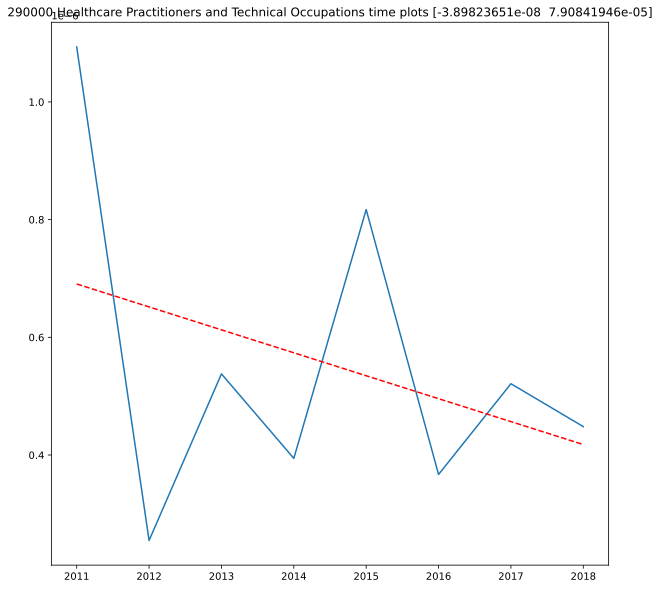

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_310000_Healthcare_Support_Occupations_time_plots_.png


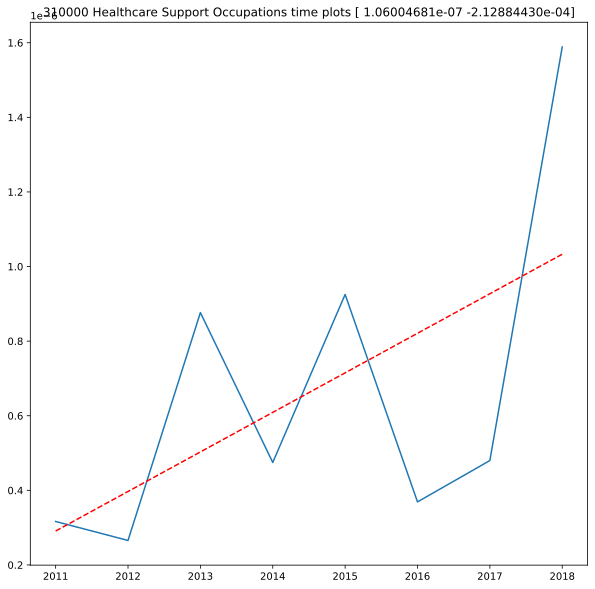

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_330000_Protective_Service_Occupations_time_plots_.png


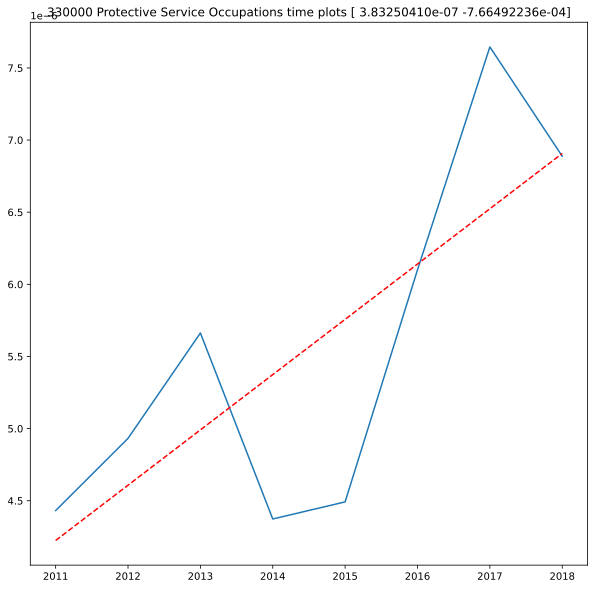

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_350000_Food_Preparation_and_Serving_Related_Occupations_time_plots_.png


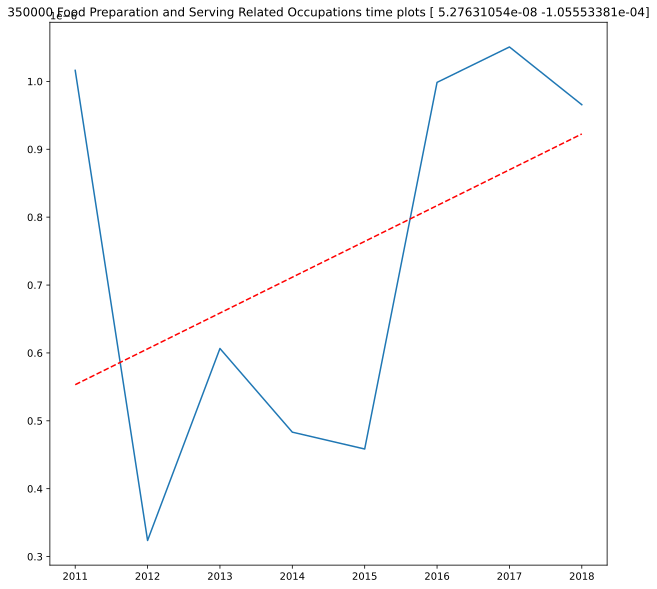

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_370000_Building_and_Grounds_Cleaning_and_Maintenance_Occupations_time_plots_.png


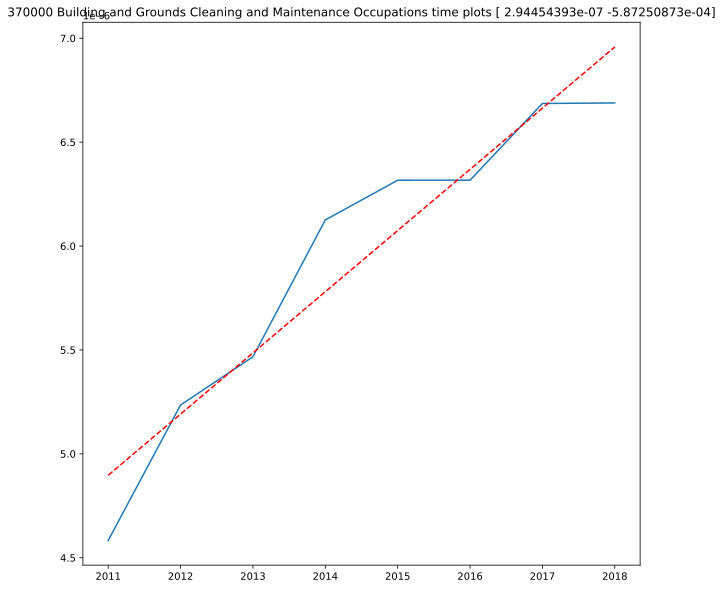

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_390000_Personal_Care_and_Service_Occupations_time_plots_.png


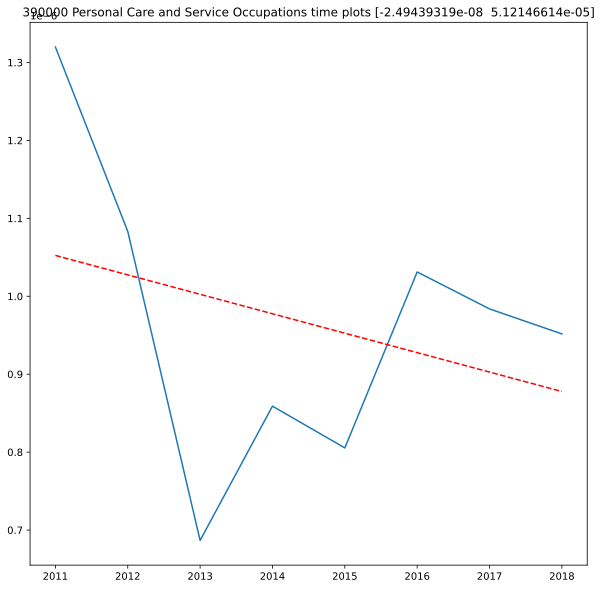

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_410000_Sales_and_Related_Occupations_time_plots_.png


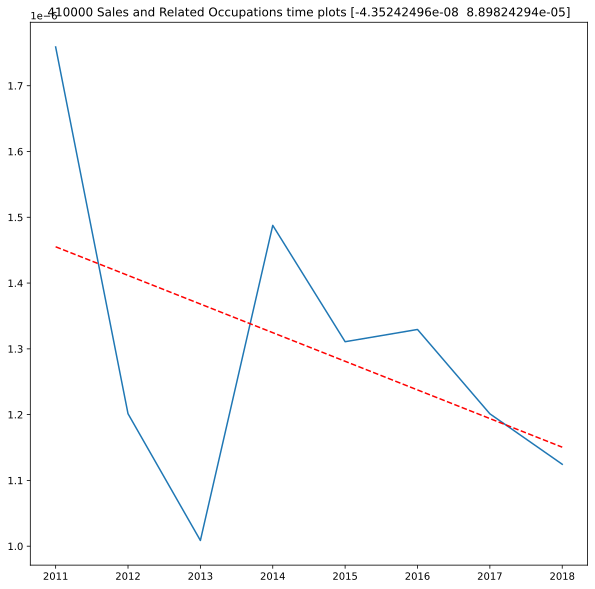

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_430000_Office_and_Administrative_Support_Occupations_time_plots_.png


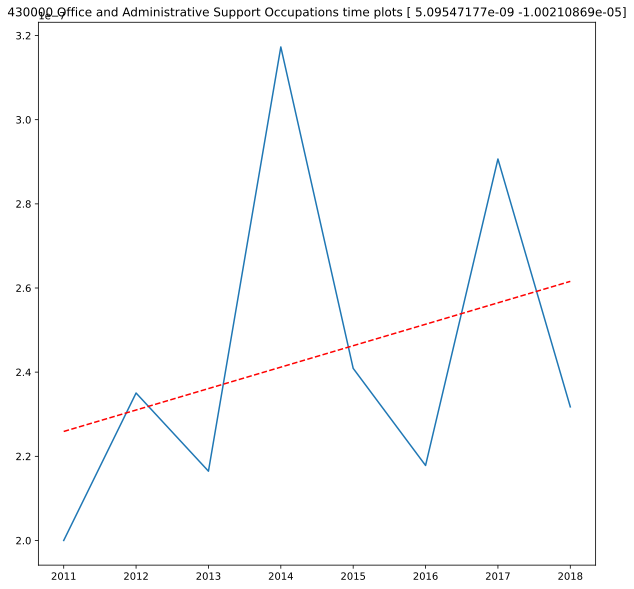

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_450000_Farming_Fishing_and_Forestry_Occupations_time_plots_.png


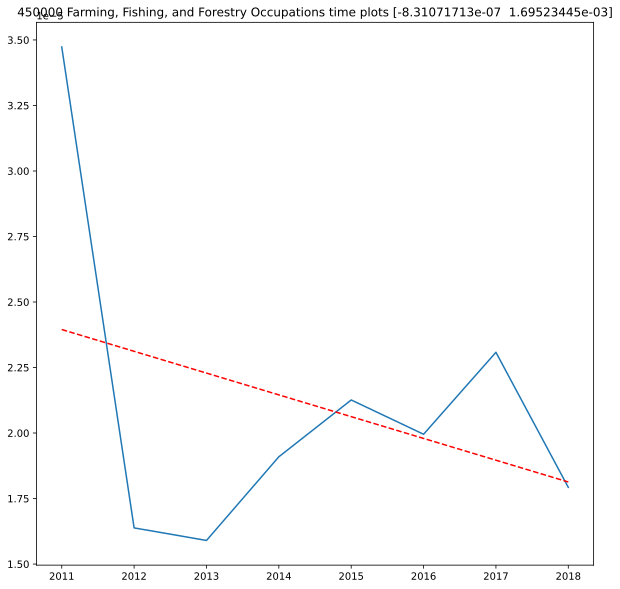

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_470000_Construction_and_Extraction_Occupations_time_plots_.png


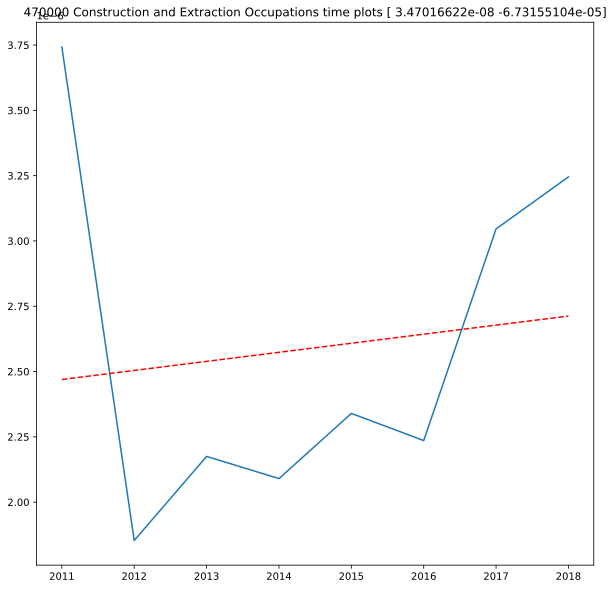

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_490000_Installation_Maintenance_and_Repair_Occupations_time_plots_.png


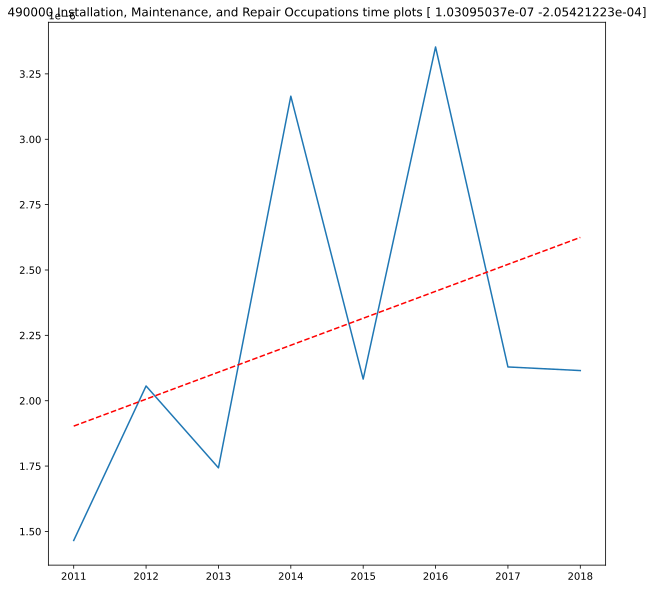

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_510000_Production_Occupations_time_plots_.png


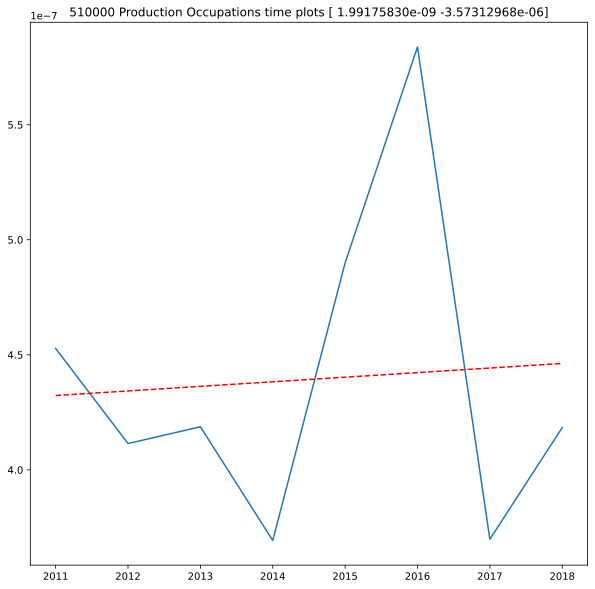

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_530000_Transportation_and_Material_Moving_Occupations_time_plots_.png


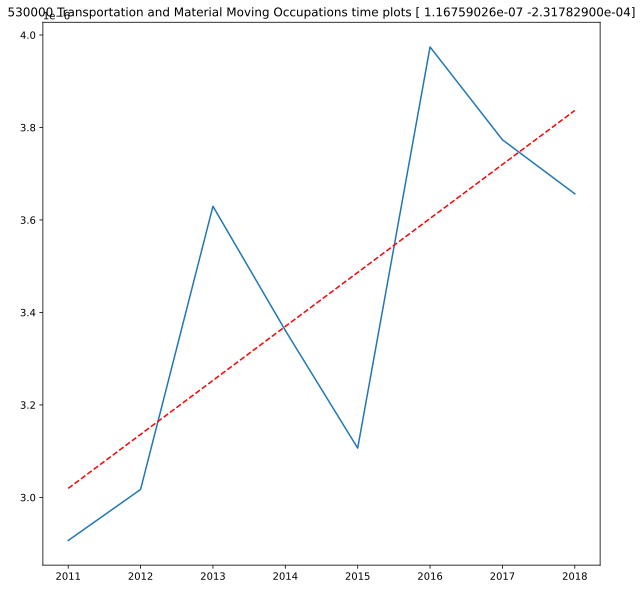

In [12]:
code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if (ucase.find("NO DATA FOUND") < 0):
        if ocup not in code_list:
            code_list.append(ocup)
        
print(code_list)

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]


for i in range(0,len(code_list)):
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
        
            year = str(yr)
            case = global_y_soc1[j][0]
            
            #print(year,ocup, case)
        
            if (case.find(year) >= 0) and (case.find(ocup) >=0):
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
    lines.append([use_case, popt])        
        
    #display(popt, pcov)
    
    for ri in range(0+2011,len(x)+2011):
        r.append(func(ri, *popt))
        #print(ri,r)
        
    plt.figure(figsize=(10, 10))
    
    plt.plot(x,y)
    plt.plot(x,r, 'r--')
    
    title = " time plots "
    
    plt.title(use_case + title + str(popt))    
    
    save_title = "../PLOTS/" + desired_file_output + use_case + title + ".png"
    save_title = save_title.replace(",","")
    save_title = save_title.replace(" ","_")
    print(save_title)
    plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
    plt.show()
    #plt.close()

In [13]:
for i in range(0,len(lines)):
    print(" y = {0: 1.8f} x + {1: 1.8f}  : {2} ".format(lines[i][1][0], lines[i][1][1], lines[i][0]))
    

 y = -0.00000002 x +  0.00003219  : 110000 Management Occupations 
 y =  0.00000001 x + -0.00002828  : 130000 Business and Financial Operations Occupations 
 y =  0.00000002 x + -0.00004335  : 150000 Computer and Mathematical Occupations 
 y = -0.00000008 x +  0.00015872  : 170000 Architecture and Engineering Occupations 
 y = -0.00000004 x +  0.00008838  : 190000 Life, Physical, and Social Science Occupations 
 y = -0.00000017 x +  0.00034090  : 210000 Community and Social Service Occupations 
 y =  0.00000003 x + -0.00006212  : 230000 Legal Occupations 
 y = -0.00000000 x +  0.00000021  : 250000 Educational Instruction and Library Occupations 
 y = -0.00000003 x +  0.00005671  : 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
 y = -0.00000004 x +  0.00007908  : 290000 Healthcare Practitioners and Technical Occupations 
 y =  0.00000011 x + -0.00021288  : 310000 Healthcare Support Occupations 
 y =  0.00000038 x + -0.00076649  : 330000 Protective Service Occupations

# CALC COV 

In [14]:
cov_array = []

code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if (ucase.find("NO DATA FOUND") < 0):
        if ocup not in code_list:
            code_list.append(ocup)
        
print(code_list)

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]


for i in range(0,len(code_list)):
    
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
        
            year = str(yr)
            case = global_y_soc1[j][0]
            
            #print(year,ocup, case)
        
            if (case.find(year) >= 0) and (case.find(ocup) >=0):
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
    #ca = global_y_soc1[0][0].split("_")[1:3]
    #use_case = ca[0] + "_" + ca[1] + ocup + "0000"
                   
    omean = np.array(y).mean()
    ostd  = np.array(y).std()
    ocov  = ostd/omean 
    #ocov.append(str(use_case),ocov)
    print(use_case,ocov)
    
    if (ocov >= 0):
        cov_array.append([str(use_case),ocov])

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']
110000 Management Occupations 0.17928417831873375
130000 Business and Financial Operations Occupations 0.41472610523364933
150000 Computer and Mathematical Occupations 0.6330712284621093
170000 Architecture and Engineering Occupations 0.45400831112505663
190000 Life, Physical, and Social Science Occupations 0.5293425897643326
210000 Community and Social Service Occupations 0.3748194074289321
230000 Legal Occupations 0.7328419204024119
250000 Educational Instruction and Library Occupations 0.3230919271768954
270000 Arts, Design, Entertainment, Sports, and Media Occupations 0.4604480954061777
290000 Healthcare Practitioners and Technical Occupations 0.46122759637516425
310000 Healthcare Support Occupations 0.6329012001116135
330000 Protective Service Occupations 0.20711791228041276
350000 Food Preparation and Serving Related Occupation

In [15]:
test_list = cov_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    

0.1061125 	 530000 Transportation and Material Moving Occupations 
0.1192344 	 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.1505451 	 510000 Production Occupations 
0.1532736 	 430000 Office and Administrative Support Occupations 
0.1677056 	 410000 Sales and Related Occupations 
0.1792842 	 110000 Management Occupations 
0.1864418 	 390000 Personal Care and Service Occupations 
0.2071179 	 330000 Protective Service Occupations 
0.2410123 	 470000 Construction and Extraction Occupations 
0.2680575 	 450000 Farming, Fishing, and Forestry Occupations 
0.2715081 	 490000 Installation, Maintenance, and Repair Occupations 
0.3230919 	 250000 Educational Instruction and Library Occupations 
0.3748194 	 210000 Community and Social Service Occupations 
0.3793699 	 350000 Food Preparation and Serving Related Occupations 
0.4147261 	 130000 Business and Financial Operations Occupations 
0.4540083 	 170000 Architecture and Engineering Occupations 
0.4604481 	 270000 Arts, D

# MEAN

In [16]:
mean_array = []

code_list = []
lines     = []

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-4]
    #print(ocup)
    if (ucase.find("NO DATA FOUND") < 0):
        if ocup not in code_list:
            code_list.append(ocup)
        
print(code_list)

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]


for i in range(0,len(code_list)):
    
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
        
            year = str(yr)
            case = global_y_soc1[j][0]
            
            #print(year,ocup, case)
        
            if (case.find(year) >= 0) and (case.find(ocup) >=0):
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:-4] + "0000 " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
        
    # Curve fit
    r = []
    try:
        popt, pcov = curve_fit(func, x, y)
    except:
        popt = [0,0]
        
    #ca = global_y_soc1[0][0].split("_")[1:3]
    #use_case = ca[0] + "_" + ca[1] + ocup + "0000"
                   
    omean = np.array(y).mean()
    #ostd  = np.array(y).std()
    #ocov  = ostd/omean 
    #ocov.append(str(use_case),ocov)
    print(use_case,omean)
    
    if (omean >= 0):
        mean_array.append([str(use_case),omean])

['_11', '_13', '_15', '_17', '_19', '_21', '_23', '_25', '_27', '_29', '_31', '_33', '_35', '_37', '_39', '_41', '_43', '_45', '_47', '_49', '_51', '_53']
110000 Management Occupations 1.1212218990422287e-06
130000 Business and Financial Operations Occupations 2.202390936475794e-07
150000 Computer and Mathematical Occupations 1.0449848026247397e-07
170000 Architecture and Engineering Occupations 5.454165674468441e-07
190000 Life, Physical, and Social Science Occupations 2.9942070831894993e-07
210000 Community and Social Service Occupations 1.5907178628021055e-06
230000 Legal Occupations 1.6362071923487065e-06
250000 Educational Instruction and Library Occupations 1.3097400346762476e-07
270000 Arts, Design, Entertainment, Sports, and Media Occupations 1.278484189271122e-06
290000 Healthcare Practitioners and Technical Occupations 5.542200813786094e-07
310000 Healthcare Support Occupations 6.620003699000745e-07
330000 Protective Service Occupations 5.565715474690119e-06
350000 Food Prepa

In [17]:
test_list = mean_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    

0.0000001 	 150000 Computer and Mathematical Occupations 
0.0000001 	 250000 Educational Instruction and Library Occupations 
0.0000002 	 130000 Business and Financial Operations Occupations 
0.0000002 	 430000 Office and Administrative Support Occupations 
0.0000003 	 190000 Life, Physical, and Social Science Occupations 
0.0000004 	 510000 Production Occupations 
0.0000005 	 170000 Architecture and Engineering Occupations 
0.0000006 	 290000 Healthcare Practitioners and Technical Occupations 
0.0000007 	 310000 Healthcare Support Occupations 
0.0000007 	 350000 Food Preparation and Serving Related Occupations 
0.0000010 	 390000 Personal Care and Service Occupations 
0.0000011 	 110000 Management Occupations 
0.0000013 	 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.0000013 	 410000 Sales and Related Occupations 
0.0000016 	 210000 Community and Social Service Occupations 
0.0000016 	 230000 Legal Occupations 
0.0000023 	 490000 Installation, Maintenance, and R

# COV LEVEL 3

In [18]:
code_list = []
soc_level = 3

for i in range(0,len(global_y_soc1)):
    ucase = str(global_y_soc1[i][0]).split('-')[0]
    #print(ucase)
    ocup    = "_" + ucase[-6:-5 + soc_level]
    #print(ocup)
    if (ucase.find("NO DATA FOUND") < 0):
        if ocup not in code_list:
            code_list.append(ocup)
        
print(code_list)

['_1110', '_1120', '_1130', '_1131', '_1190', '_1191', '_1310', '_1311', '_1320', '_1511', '_1512', '_1520', '_1710', '_1720', '_1721', '_1730', '_1910', '_1920', '_1930', '_1940', '_1950', '_2110', '_2120', '_2310', '_2320', '_2510', '_2511', '_2520', '_2530', '_2540', '_2590', '_2710', '_2720', '_2730', '_2740', '_2910', '_2911', '_2912', '_2920', '_2990', '_3110', '_3190', '_3120', '_3310', '_3320', '_3330', '_3390', '_3510', '_3520', '_3530', '_3590', '_3710', '_3720', '_3730', '_3910', '_3920', '_3930', '_3940', '_3950', '_3970', '_3990', '_4110', '_4120', '_4130', '_4140', '_4190', '_4310', '_4330', '_4340', '_4341', '_4350', '_4351', '_4360', '_4390', '_4510', '_4520', '_4530', '_4540', '_4710', '_4720', '_4721', '_4722', '_4730', '_4740', '_4750', '_4910', '_4920', '_4930', '_4990', '_5110', '_5120', '_5130', '_5140', '_5141', '_5151', '_5160', '_5170', '_5180', '_5190', '_5191', '_5310', '_5320', '_5330', '_5340', '_5350', '_5360', '_5370', '_5371']


In [19]:
cov_array = []

lines     = []

# ['_11', '_13' .... ]

#ca = global_y_soc1[0][0].split("_")[1:3]
#use_case = ca[0] + "_" + ca[1]


for i in range(0,len(code_list)):
    
    
    ocup    = str(code_list[i])
    
    x = []
    y = []

    for yr in range(2011,2019):
        
        tmp_lst = []
        
        for j in range(0,len(global_y_soc1)):
        
            year = str(yr)
            case = global_y_soc1[j][0]
            
            #print(year,ocup, case)
        
            if (case.find(year) >= 0) and (case.find(ocup) >=0):
                tmp =  global_y_soc1[j][0].split('-')
                use_ocup = tmp[0][-6:(-5 + soc_level)] + ("0"*(5-soc_level)) + " " + tmp[1]
                tmp = tmp[0].split('_')
                use_var  = str(tmp[1]) + "_" + str(tmp[2])
                #use_case = use_var + " " + use_ocup
                use_case = use_ocup
                #print(use_case)
                
                data = global_y_soc1[j][1]
                #print(year,ocup,case,data)
                
                # add up all the years for the same occupation level from code_list)
                tmp_lst = tmp_lst +  data
      
    
        occupation = str(ocup[1:]) + "0000"
        omean = np.array(tmp_lst).mean()
        #print(year,occupation,omean)
        #print(" ")
        
        x.append(yr)
        y.append(omean)
        
    #print(x,y)
                   
    omean = np.array(y).mean()
    ostd  = np.array(y).std()
    ocov  = ostd/omean 
    #ocov.append(str(use_case),ocov)
    print(use_case, ocov)
    
    if (ocov >= 0):
        cov_array.append([str(use_case),ocov])

111000 Management Occupations 0.4177478819637168
112000 Management Occupations 0.44280810180061764
113000 Management Occupations 0.3202590809322742
113100 Management Occupations 2.103766198812799
119000 Management Occupations 0.15900762171151342
119100 Management Occupations 0.17771202130295935
131000 Business and Financial Operations Occupations 0.5776628113005978
131100 Business and Financial Operations Occupations 1.0423750714105433
132000 Business and Financial Operations Occupations 0.7149919521867231
151100 Computer and Mathematical Occupations 1.0223407796767994
151200 Computer and Mathematical Occupations nan
152000 Computer and Mathematical Occupations 1.7320508075688774
171000 Architecture and Engineering Occupations 0.6370896714785516
172000 Architecture and Engineering Occupations 0.5249251117635486
172100 Architecture and Engineering Occupations 0.894421071925516
173000 Architecture and Engineering Occupations 1.1135528725660047
191000 Life, Physical, and Social Science Oc

/tmp/ipykernel_3889634/3020925241.py:58: RuntimeWarning: invalid value encountered in double_scalars
  ocov  = ostd/omean


212000 Community and Social Service Occupations 0.6291037670103585
231000 Legal Occupations 0.43699467961169697
232000 Legal Occupations 2.5464572339712372
251000 Educational Instruction and Library Occupations 1.2738358728017112
251100 Educational Instruction and Library Occupations 1.449841652156031
252000 Educational Instruction and Library Occupations 1.147656459506671
253000 Educational Instruction and Library Occupations 0.5876589950210196
254000 Educational Instruction and Library Occupations 1.0015741742090827
259000 Educational Instruction and Library Occupations 1.443166526926051
271000 Arts, Design, Entertainment, Sports, and Media Occupations 1.2760013886909791
272000 Arts, Design, Entertainment, Sports, and Media Occupations 0.332738974492519
273000 Arts, Design, Entertainment, Sports, and Media Occupations 0.9669791196963925
274000 Arts, Design, Entertainment, Sports, and Media Occupations 0.7752193769892775
291000 Healthcare Practitioners and Technical Occupations 0.4840

In [20]:
test_list = cov_array.copy()
    
# sort list of list
# sort by second index
test_list.sort(key = lambda test_list: test_list[1])
 
# printing result
for i in range(0,len(test_list)):
    print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0])))    

0.1195523 	 373000 Building and Grounds Cleaning and Maintenance Occupations 
0.1211751 	 412000 Sales and Related Occupations 
0.1288597 	 411000 Sales and Related Occupations 
0.1313514 	 452000 Farming, Fishing, and Forestry Occupations 
0.1446205 	 533000 Transportation and Material Moving Occupations 
0.1481560 	 372000 Building and Grounds Cleaning and Maintenance Occupations 
0.1590076 	 119000 Management Occupations 
0.1750774 	 537000 Transportation and Material Moving Occupations 
0.1777120 	 119100 Management Occupations 
0.1851731 	 435000 Office and Administrative Support Occupations 
0.1904427 	 472200 Construction and Extraction Occupations 
0.2129460 	 339000 Protective Service Occupations 
0.2163284 	 499000 Installation, Maintenance, and Repair Occupations 
0.2224056 	 371000 Building and Grounds Cleaning and Maintenance Occupations 
0.2277822 	 535000 Transportation and Material Moving Occupations 
0.2294261 	 475000 Construction and Extraction Occupations 
0.2471249

# VARIANCE ACROSS GENDER

In [21]:
def get_case_list(soc_level, desired_case):
    code_list = []

    #soc_level = 1
    #desired_case = "16to19"

    global global_y_soc1
    
    for i in range(0,len(global_y_soc1)):
        ucase = str(global_y_soc1[i][0]).split('-')[0]
        #print(ucase)
        
        if (ucase.find("NO DATA FOUND") < 0):
            ocup    = "_" + desired_case + "_" + ucase[-6:-5 + soc_level]
            #print(ocup)
            if ocup not in code_list:
                code_list.append(ocup)
                #if (str(ocup[1:]).isnumeric()):
                #    code_list.append(ocup)
        
    #print(code_list)
    
    return(code_list)

In [22]:
#soc_level = 1
#desired_case = "16to19"
#
#get_case_list(soc_level, desired_case)

In [23]:
cases = ["GMX_M","GFX_F"]

mult_array = []

for desired_case in cases:

    soc_level = 1
    #desired_case = "16to19"

    code_list = get_case_list(soc_level, desired_case)

    cov_array = []

    for i in range(0,len(code_list)):
      
        ocup    = str(code_list[i])
    
        x = []
        y = []

        for yr in range(2011,2019):
        
            tmp_lst = []
        
            for j in range(0,len(global_y_soc1)):
        
                year = str(yr)
                case = global_y_soc1[j][0]
            
                #print(year,ocup, case)
        
                if (case.find(year) >= 0) and (case.find(ocup) >=0):
                    tmp =  global_y_soc1[j][0].split('-')
                    use_ocup = tmp[0][-6:(-5 + soc_level)] + ("0"*(5-soc_level)) + " " + tmp[1]
                    tmp = tmp[0].split('_')
                    use_var  = str(tmp[1]) + "_" + str(tmp[2])
                    #use_case = use_var + " " + use_ocup
                    use_case = use_ocup
                    #print(use_case)
                
                    data = global_y_soc1[j][1]
                    #print(year,ocup,case,data)
                
                    # add up all the years for the same occupation level from code_list)
                    tmp_lst = tmp_lst +  data
      
    
            occupation = str(ocup[1:]) + "0000"
        
            #print(tmp_lst)
            if (len(tmp_lst) == 0):
                mean = 0.0
            else:
                omean = np.array(tmp_lst).mean()
            
            #print(year,occupation,omean)
            #print(" ")
        
            x.append(yr)
            y.append(omean)
        
        #print(x,y)
                   
        omean = np.array(y).mean()
        ostd  = np.array(y).std()
        ocov  = ostd/omean 
    
        if math.isnan(ocov):
            ocov = 0.0
        
        ocov_case = desired_case + " " + use_case
    
        #ocov.append(str(use_case),ocov)
        #print(ocov_case, ocov)

        cov_array.append([str(ocov_case),ocov])
        
    mult_array.append([str(desired_case),cov_array])
    
    # SORT LIST
    
    #test_list = cov_array.copy()
    
    # sort list of list
    # sort by second index
    #test_list.sort(key = lambda test_list: test_list[1])
 
    # printing result
    #for i in range(0,len(test_list)):
        #print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0]))) 
        
    for i in range(0,len(cov_array)):
        print("{0:1.7f} \t {1:} ".format(cov_array[i][1], str(cov_array[i][0]))) 

    print(" ")

0.1328440 	 GMX_M 110000 Management Occupations 
0.5341849 	 GMX_M 130000 Business and Financial Operations Occupations 
0.6190949 	 GMX_M 150000 Computer and Mathematical Occupations 
0.3307970 	 GMX_M 170000 Architecture and Engineering Occupations 
0.6558708 	 GMX_M 190000 Life, Physical, and Social Science Occupations 
0.4230652 	 GMX_M 210000 Community and Social Service Occupations 
0.3379788 	 GMX_M 230000 Legal Occupations 
0.3304364 	 GMX_M 250000 Educational Instruction and Library Occupations 
0.3770138 	 GMX_M 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.4138349 	 GMX_M 290000 Healthcare Practitioners and Technical Occupations 
0.9210562 	 GMX_M 310000 Healthcare Support Occupations 
0.1515695 	 GMX_M 330000 Protective Service Occupations 
0.4078620 	 GMX_M 350000 Food Preparation and Serving Related Occupations 
0.1542957 	 GMX_M 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.2609375 	 GMX_M 390000 Personal Care and Service Occu

In [24]:
print(len(mult_array))

2


../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_Coef_by_AGE.png


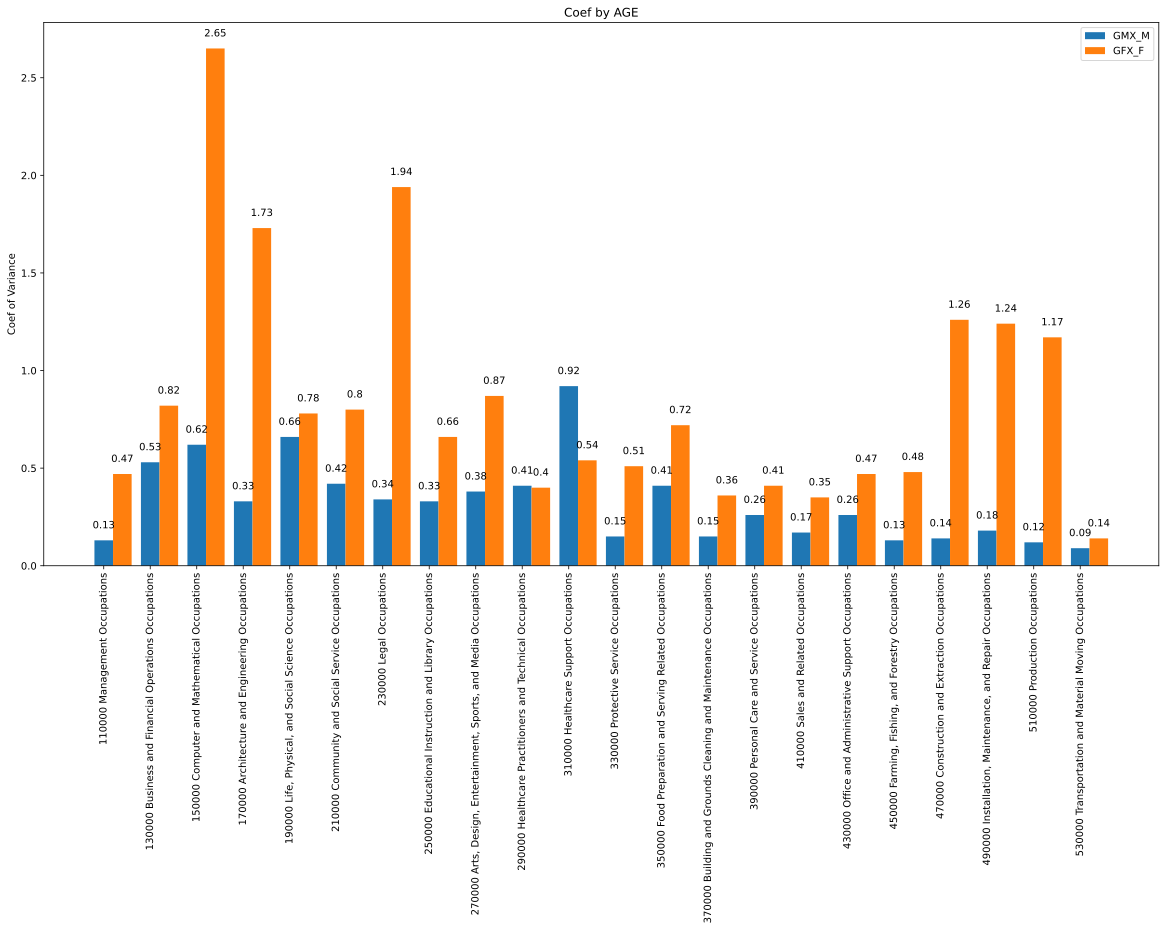

In [25]:
labels = []
for i in range(0,len(mult_array[0][1])):
    line = mult_array[0][1][i]
    larr = str(line[0]).split(" ")
    lbl  = ""
    for j in range(0,len(larr[1:])):
        lbl = lbl + " " + str(larr[1+j])
                              
    labels.append(lbl)

groups = len(mult_array)
grpd = []
grpl = []
for i in range(0,len(mult_array)):
    subgrp = []
    # Get value point by point
    for j in range(0,len(mult_array[i][1])):
        val = mult_array[i][1][j][1]
        val = round(val,2)
        subgrp.append(val)

    #print(subgrp)
    grpl.append(mult_array[i][0])
    grpd.append(subgrp)
    
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

rects = []

fig, ax = plt.subplots(figsize=(20, 10))

for i in range(0,len(grpd)):
    tmp_rect = ax.bar(x+i*(width), grpd[i], width, label=grpl[i])
    rects.append(tmp_rect)


title = "Coef by AGE"
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Coef of Variance')
ax.set_title(title)
ax.set_xticks(x, labels, rotation=90)
ax.legend()

#ax.set_ylim(0, 0.25)

for i in range(0,len(grpd)):
    ax.bar_label(rects[i], padding=10)

#fig.tight_layout() 
    
save_title = "../PLOTS/" + desired_file_output + title + ".png"
save_title = save_title.replace(",","")
save_title = save_title.replace(" ","_")
print(save_title)
plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
plt.show()
#plt.close()
    


# MEAN

In [26]:
cases = ["GMX_M", "GFX_F"]

mult_array = []

for desired_case in cases:

    soc_level = 1
    #desired_case = "16to19"

    code_list = get_case_list(soc_level, desired_case)

    mean_array = []

    for i in range(0,len(code_list)):
      
        ocup    = str(code_list[i])
    
        x = []
        y = []

        for yr in range(2011,2019):
        
            tmp_lst = []
        
            for j in range(0,len(global_y_soc1)):
        
                year = str(yr)
                case = global_y_soc1[j][0]
            
                #print(year,ocup, case)
        
                if (case.find(year) >= 0) and (case.find(ocup) >=0):
                    tmp =  global_y_soc1[j][0].split('-')
                    use_ocup = tmp[0][-6:(-5 + soc_level)] + ("0"*(5-soc_level)) + " " + tmp[1]
                    tmp = tmp[0].split('_')
                    use_var  = str(tmp[1]) + "_" + str(tmp[2])
                    #use_case = use_var + " " + use_ocup
                    use_case = use_ocup
                    #print(use_case)
                
                    data = global_y_soc1[j][1]
                    #print(year,ocup,case,data)
                
                    # add up all the years for the same occupation level from code_list)
                    tmp_lst = tmp_lst +  data
      
    
            occupation = str(ocup[1:]) + "0000"
        
            #print(tmp_lst)
            if (len(tmp_lst) == 0):
                mean = 0.0
            else:
                omean = np.array(tmp_lst).mean()
            
            #print(year,occupation,omean)
            #print(" ")
        
            x.append(yr)
            y.append(omean)
        
        #print(x,y)
                   
        omean = np.array(y).mean()
        #ostd  = np.array(y).std()
        #ocov  = ostd/omean 
    
        if math.isnan(omean):
            ocov = 0.0
        
        omean_case = desired_case + " " + use_case
    
        #ocov.append(str(use_case),ocov)
        #print(ocov_case, ocov)

        mean_array.append([str(omean_case),omean])
        
    mult_array.append([str(desired_case),mean_array])
    
    # SORT LIST
    
    #test_list = cov_array.copy()
    
    # sort list of list
    # sort by second index
    #test_list.sort(key = lambda test_list: test_list[1])
 
    # printing result
    #for i in range(0,len(test_list)):
        #print("{0:1.7f} \t {1:} ".format(test_list[i][1], str(test_list[i][0]))) 
        
    for i in range(0,len(mean_array)):
        print("{0:1.7f} \t {1:} ".format(mean_array[i][1], str(mean_array[i][0]))) 

    print(" ")

0.0000017 	 GMX_M 110000 Management Occupations 
0.0000005 	 GMX_M 130000 Business and Financial Operations Occupations 
0.0000001 	 GMX_M 150000 Computer and Mathematical Occupations 
0.0000009 	 GMX_M 170000 Architecture and Engineering Occupations 
0.0000005 	 GMX_M 190000 Life, Physical, and Social Science Occupations 
0.0000038 	 GMX_M 210000 Community and Social Service Occupations 
0.0000096 	 GMX_M 230000 Legal Occupations 
0.0000002 	 GMX_M 250000 Educational Instruction and Library Occupations 
0.0000024 	 GMX_M 270000 Arts, Design, Entertainment, Sports, and Media Occupations 
0.0000008 	 GMX_M 290000 Healthcare Practitioners and Technical Occupations 
0.0000014 	 GMX_M 310000 Healthcare Support Occupations 
0.0000096 	 GMX_M 330000 Protective Service Occupations 
0.0000014 	 GMX_M 350000 Food Preparation and Serving Related Occupations 
0.0000111 	 GMX_M 370000 Building and Grounds Cleaning and Maintenance Occupations 
0.0000019 	 GMX_M 390000 Personal Care and Service Occu

../PLOTS/./NF_SUBAVG_GENDER/NF_GENDER_2018_Mean_Injury_per_100000_by_AGE.png


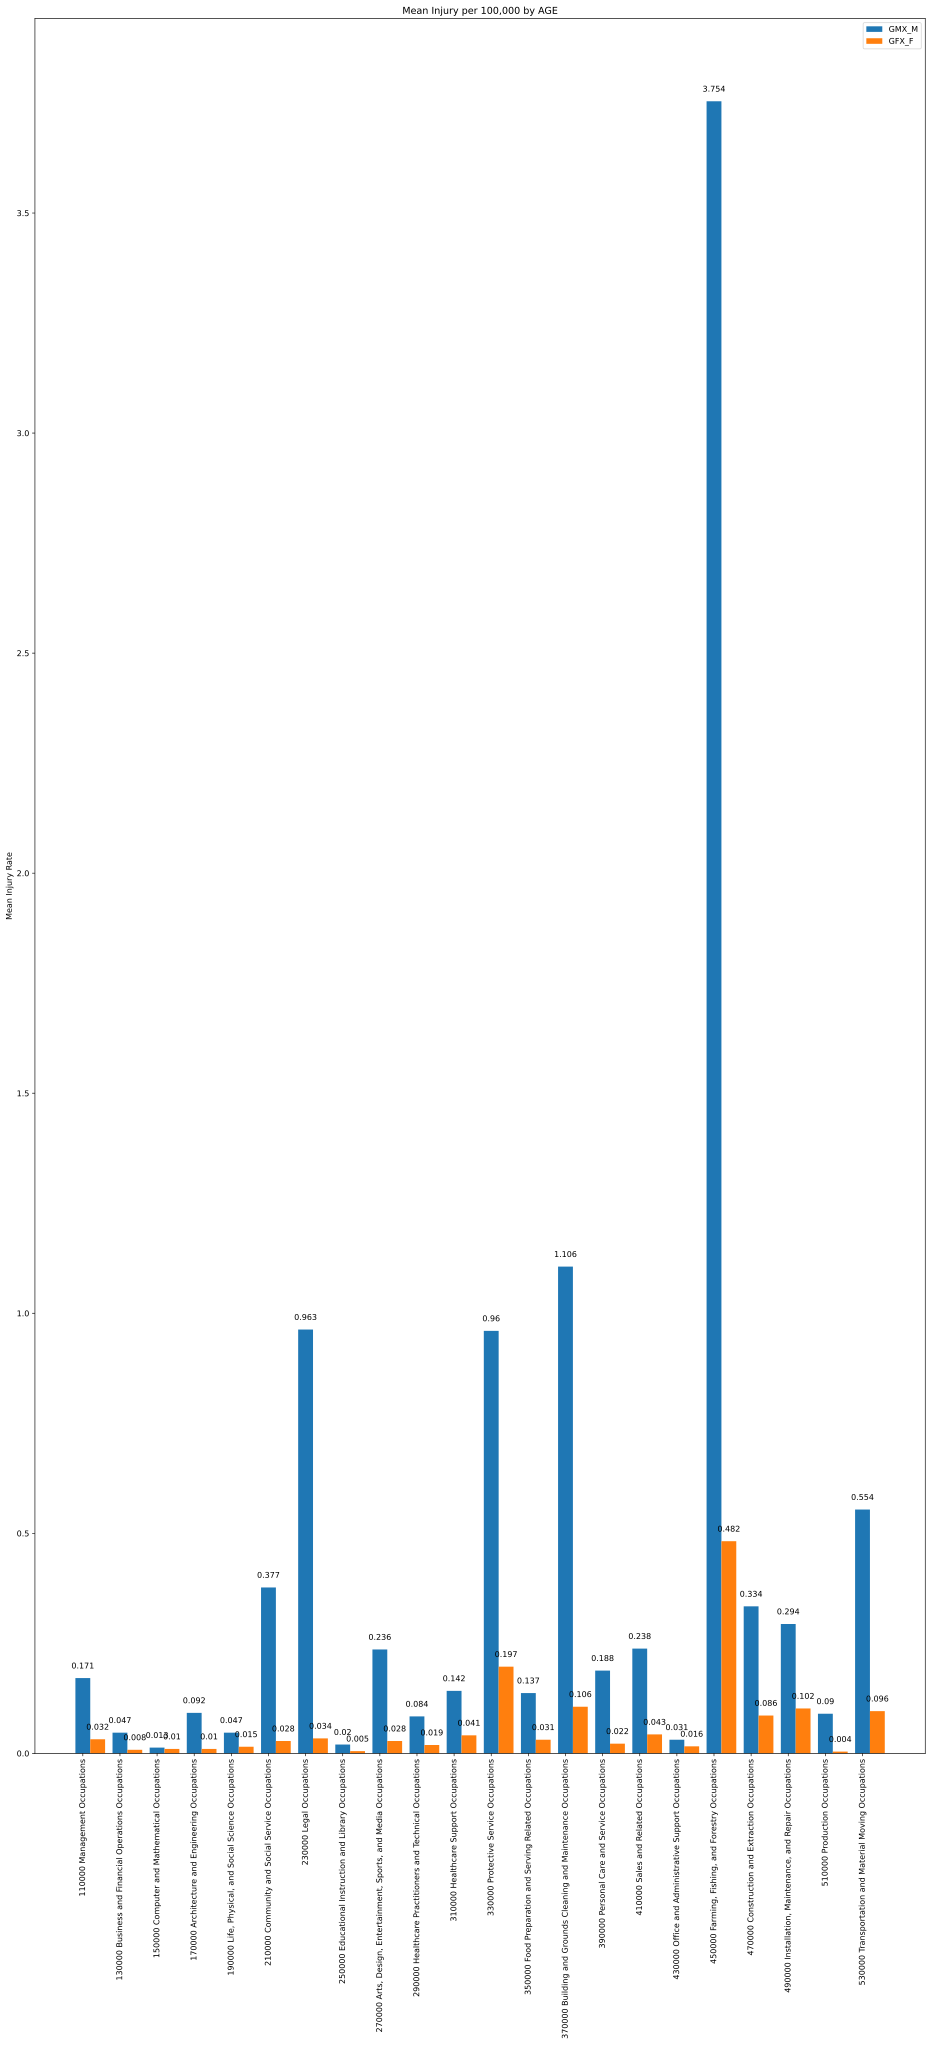

In [33]:
labels = []
for i in range(0,len(mult_array[0][1])):
    line = mult_array[0][1][i]
    larr = str(line[0]).split(" ")
    lbl  = ""
    for j in range(0,len(larr[1:])):
        lbl = lbl + " " + str(larr[1+j])
                              
    labels.append(lbl)

groups = len(mult_array)
grpd = []
grpl = []
for i in range(0,len(mult_array)):
    subgrp = []
    # Get value point by point
    for j in range(0,len(mult_array[i][1])):
        val = mult_array[i][1][j][1]
        
        val = round(100000*val,3)
        
        subgrp.append(val)

    #print(subgrp)
    grpl.append(mult_array[i][0])
    grpd.append(subgrp)
    
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

rects = []

fig, ax = plt.subplots(figsize=(20, 40))

for i in range(0,len(grpd)):
    tmp_rect = ax.bar(x+i*(width), grpd[i], width, label=grpl[i])
    rects.append(tmp_rect)

    
title = "Mean Injury per 100,000 by AGE"
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Injury Rate')
ax.set_title(title)
ax.set_xticks(x, labels, rotation=90)
ax.legend()

#ax.set_ylim(0, 0.5)

for i in range(0,len(grpd)):
    ax.bar_label(rects[i], padding=10)

#fig.tight_layout() 
    
save_title = "../PLOTS/" + desired_file_output + title + ".png"
save_title = save_title.replace(",","")
save_title = save_title.replace(" ","_")
print(save_title)
plt.savefig(save_title, dpi=100, bbox_inches='tight')
    
plt.show()
#plt.close()



# T TEST TWO DISTRIBUTIONS

In [34]:
import scipy.stats as stats

In [35]:
data_group1 = grpd[0]
data_group2 = grpd[1]

stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=2.2217465746278577, pvalue=0.031743883908958694)


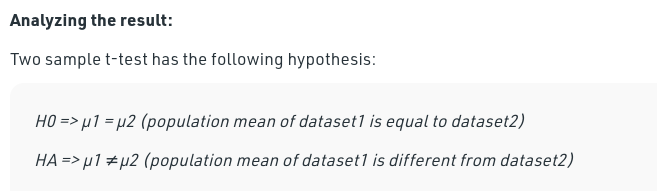


#### Since the p-value (0.0317) is less than alpha = 0.05 so we CAN reject the null
#### hypothesis of the test. We DO have sufficient evidence to say that the mean 
#### fatality probability across occupational groups is different.